Exercise Sheet 5 **Perceptual Bistability**

__Adu Matory__ and __Lukas Braun__, November 15, 2019

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

**Exercise 1**

1. Write a function laing chow which implements eqs. (1-4) from Laing and Chow
(2002) and which can be given to scipy.integrate.odeint as its first argument. The
parameters of the model should be additional arguments of laing chow such that
you can investigate the behavior of the model for different parameter settings.
Reproduce qualitatively Fig. 9 of Laing and Chow (2002) by integrating the differential equation defined by laing chow using odeint(laing chow, x0, t, args=(I1,
I2)) where x0 should contain the initial values u1 = 1, a1 = 0.1 u2 = 0, a2 = 0.25,
t should range from 0 to 500, I are the inputs with I1 = 0.43, I2 = 0.5 and all
other parameters of the model should be set by default to α = 0.2, β = 0.4, φ = 0.4, τ = 20, g1 = g2 = 1 in laing chow.

In [0]:
def laing_chow(x0,t,I1,I2): # t is unused in the function?
  alpha = .2
  beta = .4
  phi = .4
  tau = 20
  g1 = g2 = 1

  u1, a1, u2, a2 = x0

  du1dt = -u1 + np.heaviside(alpha*u1*g1 - beta*u2*g2 - a1 + I1,1)
  da1dt = (-a1 + phi*np.heaviside(alpha*u1*g1 - beta*u2*g2 - a1 + I1,1))/tau
  du2dt = -u2 + np.heaviside(alpha*u2*g2 - beta*u1*g1 - a2 + I2,1)
  da2dt = (-a2 + phi*np.heaviside(alpha*u2*g2 - beta*u1*g1 - a2 + I2,1))/tau

  return np.array([du1dt, da1dt, du2dt, da2dt])

In [0]:
# a is population adaptations
# g is synaptic depression
# u is spatially averaged net excitatory activity of each localized population 

u1 = 1
a1 = .1
u2 = 0
a2 = .25
x0 = np.array([u1,a1,u2,a2]) # Initial condition on x0 (can be a vector)

I1 = .43
I2 = .5

t = np.arange(500+1)

data = scipy.integrate.odeint(laing_chow, x0, t, args=(I1,I2))
# data.shape, data

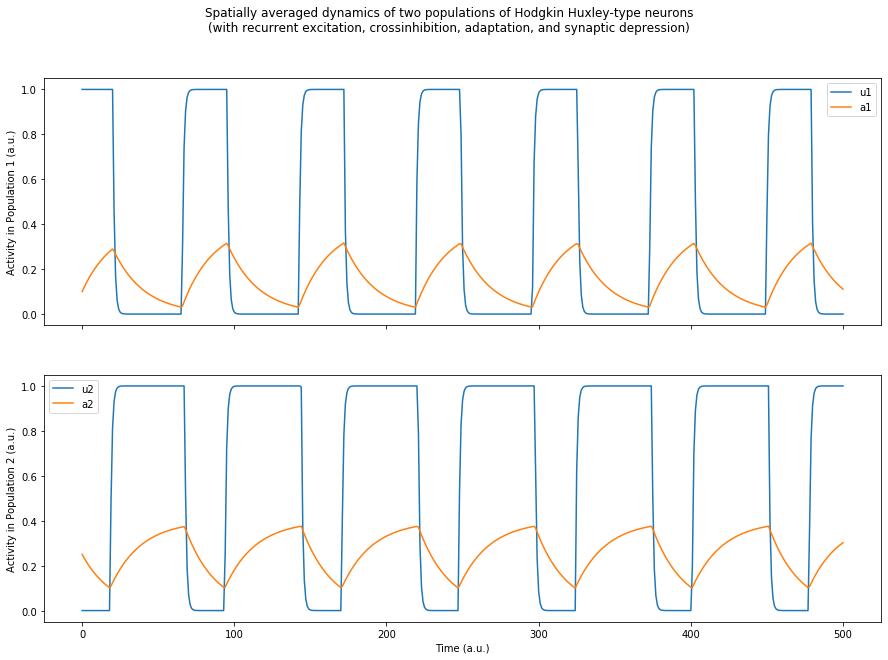

In [4]:
def LC_fig9(t,data):
  fig, axs = plt.subplots(2,1,figsize=(15, 10), facecolor='w', edgecolor='k',sharex=True,sharey=False)
  fig.subplots_adjust(hspace = .2, wspace=.1)
  axs = axs.ravel()

  fig.suptitle('Spatially averaged dynamics of two populations of Hodgkin Huxley-type neurons\n(with recurrent excitation, crossinhibition, adaptation, and synaptic depression)')

  axs[0].plot(t,data[:,0],label='u1')
  axs[0].plot(t,data[:,1],label='a1')
  axs[0].legend()
  axs[0].set_ylabel('Activity in Population 1 (a.u.)')

  axs[1].plot(t,data[:,2],label='u2')
  axs[1].plot(t,data[:,3],label='a2')
  axs[1].legend()
  axs[1].set_xlabel('Time (a.u.)')
  axs[1].set_ylabel('Activity in Population 2 (a.u.)')

  fig.show()

LC_fig9(t,data)

2. Let us define population 1 as active if u1 > u2 and equivalently for population 2. Determine the dominance durations D1 during which population 1 is active,
from your simulations. To do this write a function dominance durations(x1, x2,
t) where x1 and x2 are arrays containing the simulated states and t is an array
of the same length containing the corresponding times. The result should be an
array containing the duration of each dominance period in the data. Why are the
dominance durations different from the analytical T1 (eq. 9) in the paper?


In [5]:
def dominance_durations(x1, x2, t,dt):
  '''input of 2 time series of equivalent length (x1,x2), the length of the time
  series in dt, and the resolution (dt)'''
  tottime = np.arange(t[0]/dt,t[-1]/dt + dt) # increments of dt
  domtime = tottime[np.where(x1>x2)[0]] # dt where dominant
  domstart = [domtime[0]] # add first dominant time
  domend = []

  for i,x in enumerate(domtime[:-1]): # from the 2nd to 2nd to last dominant time
    if int(x+1) != int(domtime[i+1]): # if the next dominant time isn't one dt later
      # print(domtime[i+1],x)
      domend.append(x) # add the current time as the end of a dominant period
    
      if i+1 != len(domtime): # if one dt later isn't the last dominant time
        domstart.append(domtime[i+1]) # add the next dominant time as the start of one

  domend.append(domtime[-1]) # add last dominant time

  # print(domstart,domend)
  D1 = (np.array(domend) - np.array(domstart) + 1) * dt

  #truncating list of durations if too long
  if len(D1) > 6:
    end = 6
  else:
    end = len(D1)

  print(f'The first few dominance durations for population 1 in a simulation over {len(t)-1} time units are {D1[0:end]}')

  return D1

dd = dominance_durations(data[:,0],data[:,2],t,1)

The first few dominance durations for population 1 in a simulation over 500 time units are [21. 28. 28. 28. 28. 28.]


Actually, the dominance duration looks the same as the analytical T1 for I1 = .43. It's around 28 time units for all full dominance cycles.

3. The paper states that, if the inputs are larger than −α + β + φ, both populations
become active and oscillation will stop. Can you confirm this? What about input
values in between these new and the original input values? Do the analytical
dominance periods still fit the experimental results? How do you interpret these
results?


The first few dominance durations for population 1 in a simulation over 500 time units are [25.  2.  5.  3.  2.  4.]


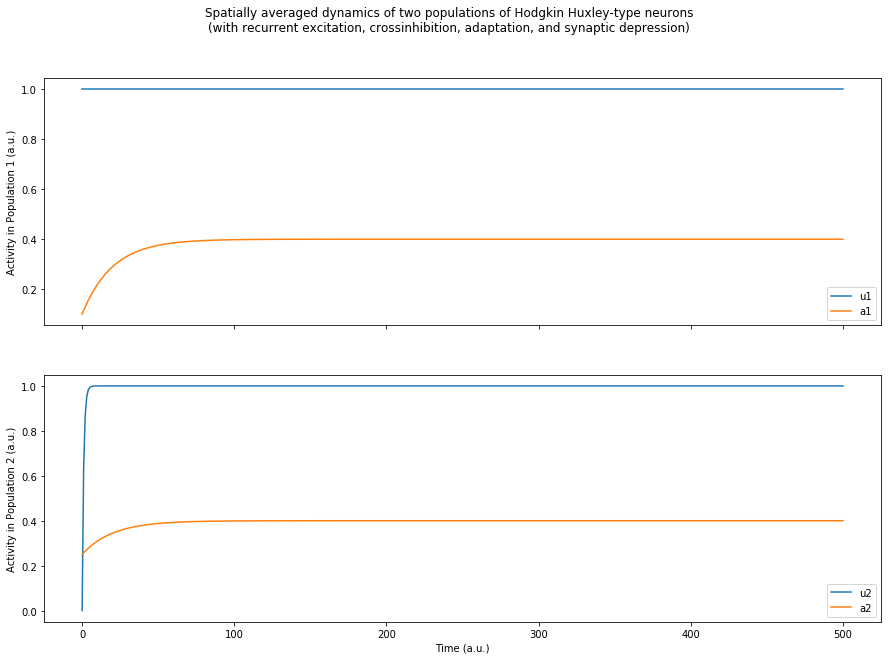

In [6]:
nI1 = nI2 = (-.2 + .4 + .4) + .05 # new values with .1 offset
data = scipy.integrate.odeint(laing_chow, x0, t, args=(nI1,nI2))
LC_fig9(t,data)
dd = dominance_durations(data[:,0],data[:,2],t,1)

We can confirm, when both input values are larger than −α + β + φ, both populations become active and (at least largely apparent) oscillation will stop.

I1: 0.54, I2: 0.58
The first few dominance durations for population 1 in a simulation over 500 time units are [33. 25. 19. 18. 18. 18.]


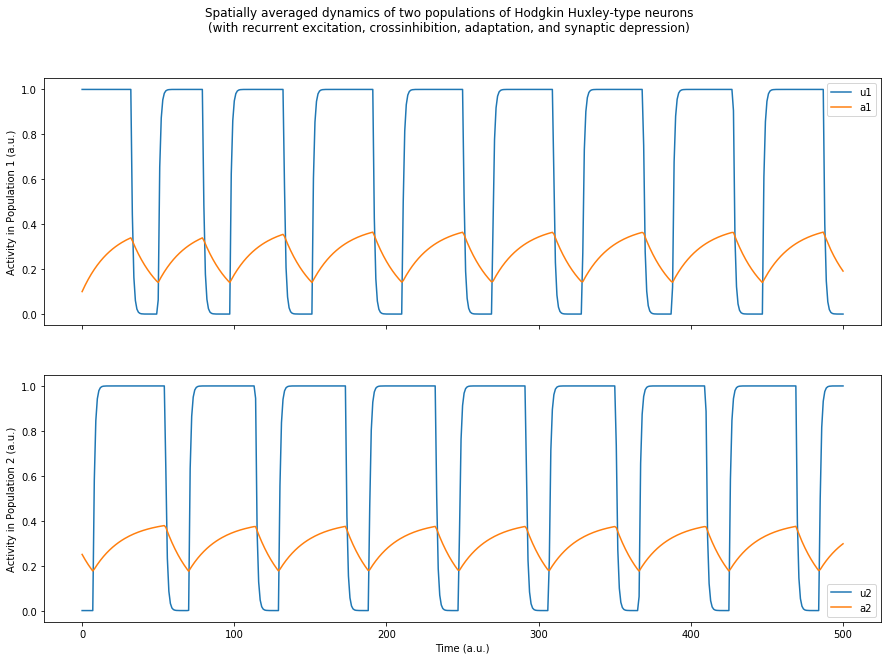

In [7]:
bI1 = np.mean((nI1,I1)) # between new and original values
bI2 = np.mean((nI2,I2))

def BRpipeline(bI1,bI2): # full binocular rivalry exercise pipeline as a function, to play around with input
  data = scipy.integrate.odeint(laing_chow, x0, t, args=(bI1,bI2))
  LC_fig9(t,data)
  print(f'I1: {bI1:.02}, I2: {bI2:.02}')
  dd = dominance_durations(data[:,0],data[:,2],t,1)

BRpipeline(bI1,bI2)

I1: 0.54, I2: 0.5
The first few dominance durations for population 1 in a simulation over 500 time units are [33. 29. 28. 27. 28. 28.]


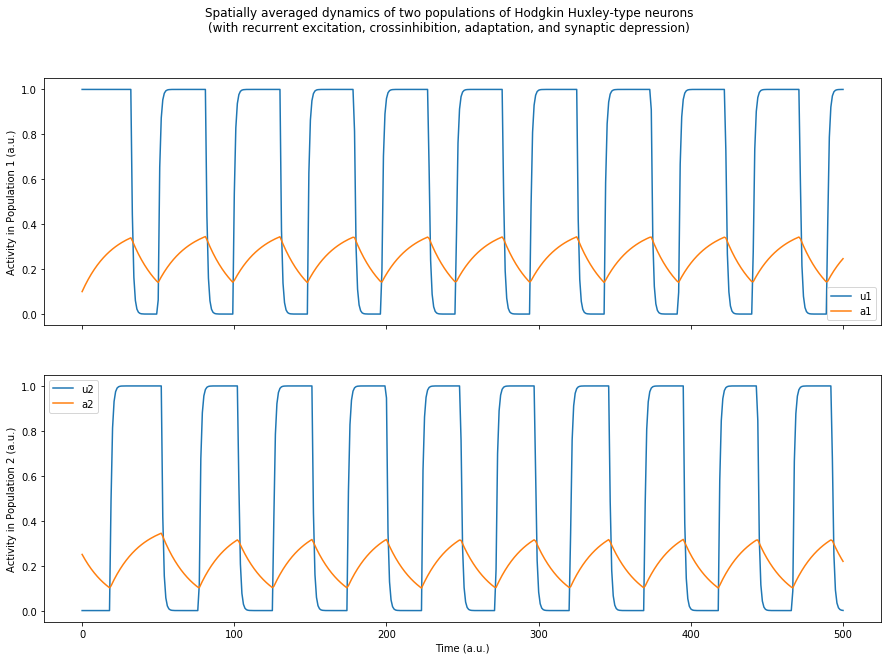

In [9]:
BRpipeline(bI1,I2)

Taking the mean of our new values and original values, we see a higher perceptual alternation rate, which takes more time to converge to a constant. After this convergence, the experimental results fit the analytical.

We can further illustrate the consequences of the model by reverting the I2 current to its original value and seeing how a new value of I1 affects dynamics.

From these results, we can see that this model accurately captures Levelt's 2nd proposition for binocular rivalry, that changing the input strength to one eye/neuron popular only affects the mean dominance duration of the contralateral eye/other population.

**Exercise 2**

1. Why can’t you use scipy.integrate.odeint to implement the model in Moreno-Bote
et al. (2007)?


?

2. You will have to write your own integration function. We will use the EulerMaruyama method. Euler-Maruyama is an extension of the simple Euler method
to stochastic differential equations where we here only consider Gaussian noise
processes. Euler-Maruyama integrates differential equations of the form
  
  dX(t) = f(X(t))dt + g(X(t))dW(t)

  here f(X(t)) is the deterministic part of the differential equation and g(X(t))dW(t)
  is the stochastic part where dW(t) is a random variable. Euler-Maruyama consists
  of the following update which your function has to implement:

  Xt = Xt−1 + f(Xt−1)∆t + g(Xt−1)√∆tWt

  Each Wt is a sample from a standard normal distribution. For more information
  about Euler-Maruyama see Higham (2001), or Wikipedia.
  Write a function euler maruyama(ffun, gfun, x0, t, **args) which implements this
  equation and which behaves like odeint. Note that we have defined args as a
  dictionary which differs from odeint where args is a tuple. This makes it easier
  to change individual parameters of the model functions later. Test your function
  by using ffun=laing chow and gfun=0 (hint: you can implement gfun compactly
  using Python’s lambda notation). For small enough time steps

In [0]:
def euler_maruyama(ffun, gfun, x0, t, dt):
  timesteps = np.arange(t[0], t[-1], dt)
  x = [x0]
  for i,ts in enumerate(timesteps[:-1]):
    Wt = np.random.normal(loc = 0.0, scale = np.sqrt(dt))
    x.append(x[i] + dt * f(x[i],ts) + g(x[i])*np.sqrt(dt)*Wt)
  return timesteps, np.array(x)

In [0]:
f = lambda b, t : laing_chow(b,t,I1,I2)
g = lambda a : 0
dt = .1 # integrates every 1/10 of a time steps

steps, em_data = euler_maruyama(f, g, x0, t, dt)
# em_data.shape

Ensuring same result as with odeint...


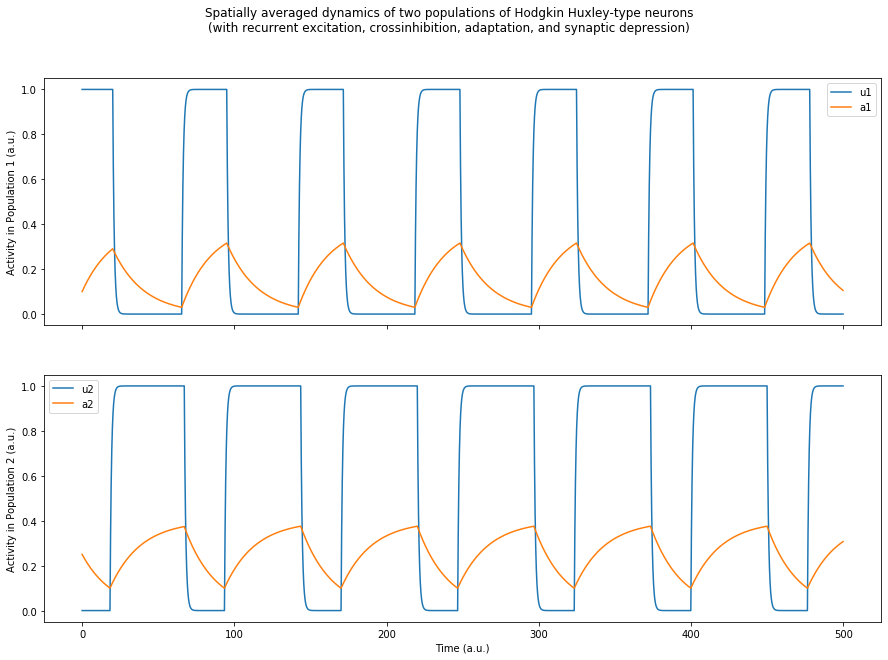

In [12]:
LC_fig9(steps, em_data)
print('Ensuring same result as with odeint...')

3. Make ffun return 0 and gfun return 1/τ . Simulate this stochastic differential
equation between t = 0 and t = 5 with ∆t = 0.01 for τ = 0.1 and for τ = 1. Further, simulate the stochastic differential equation with gfun as before and
ffun=−x/τ . Compare the results of the four simulations. What is similar? What
is different? (hint: look up Wiener processes and Ornstein-Uhlenbeck processes.
Your answer should incorporate these terms.)

In [0]:
t = np.arange(5+1)
dt = .01
tauvals = [.1,1]

pop1 = [0,1,'u1','a1', 'Population 1']
pop2 = [2,3,'u2','a2', 'Population 2']

def ex23_plot(pop):

  fig, axs = plt.subplots(2,2,figsize=(15, 10), facecolor='w', edgecolor='k',sharex=True,sharey=True)
  fig.subplots_adjust(hspace = .2, wspace=.1)
  axs = axs.ravel()

  plt.rcParams.update({'font.size': 11})

  for i,tauv in enumerate(tauvals):
    f1 = lambda a,b : 0
    f2 = lambda a,b : -a/tauv
    g1 = lambda a : 1/tauv
    g2 = lambda a : 0

    steps, em_data = euler_maruyama(f1, g1, x0, t, dt)

    axs[i].plot(steps,em_data[:,pop[0]],label=pop[2])
    axs[i].plot(steps,em_data[:,pop[1]],label=pop[3])
    axs[i].legend()
    axs[i].set_title(f'tau={tauv},'+ r'ffun=0, gfun=1/$\tau$')

    steps, em_data = euler_maruyama(f2, g2, x0, t, dt)

    axs[i+2].plot(steps,em_data[:,pop[0]],label=pop[2])
    axs[i+2].plot(steps,em_data[:,pop[1]],label=pop[3])
    axs[i+2].legend()
    axs[i+2].set_title(f'tau={tauv},'+ r'ffun=-x/$\tau$, gfun=0')

    # plt.rcParams.update({'font.size': 14})
    fig.suptitle('Comparing Euler-Maruyama across various SDEs')
    fig.text(0.5, 0.04, 'Time (a.u.)', ha='center')
    fig.text(0.04, 0.5, f'Activity in {pop[4]} (a.u.)', va='center', rotation='vertical')
    fig.show()

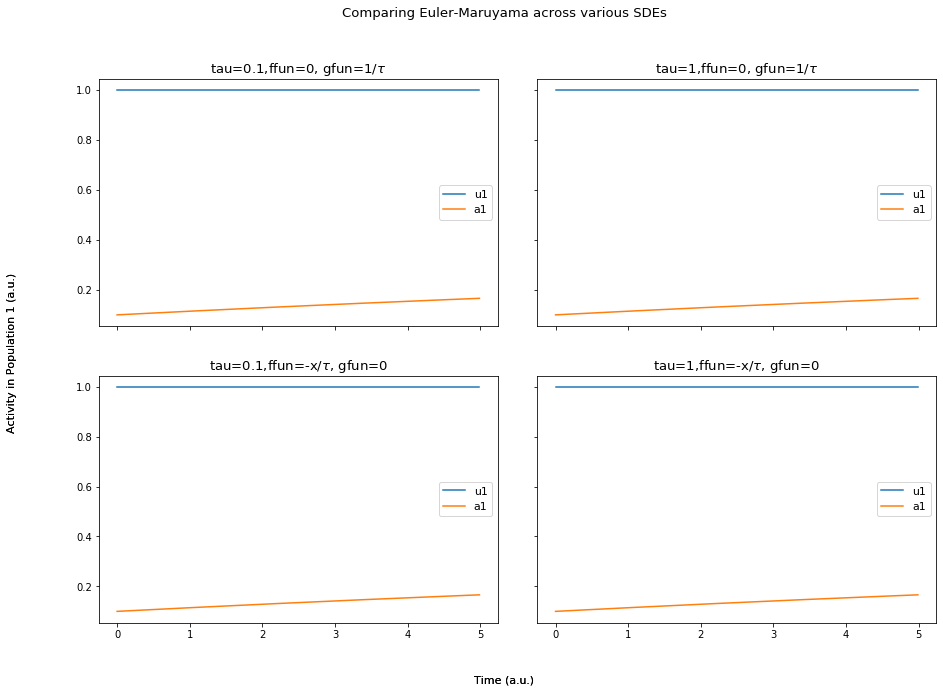

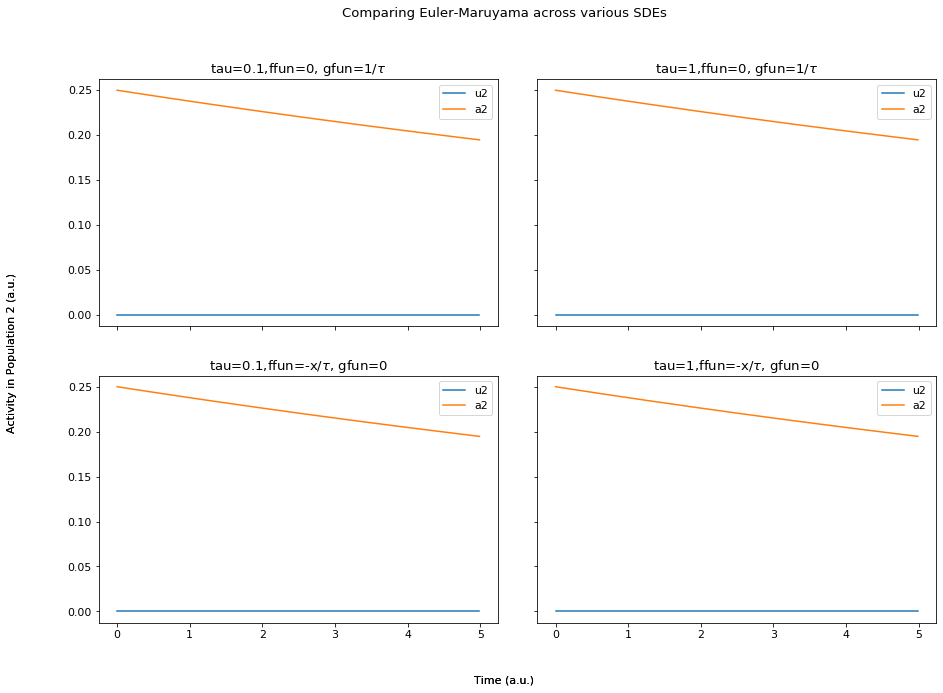

In [14]:
ex23_plot(pop1)
ex23_plot(pop2)

In all simulations, the activity of the first population remains dominant and the second remains near zero. The Ornstein-Uhlenbeck process drifts to a long-term mean over time, while the Wiener proces does not. Higher tau increases high variance in each process.

4. Finally, write functions f moreno bote and g moreno bote which implement equations (A1, B5, B6, B7) of Moreno-Bote et al. (2007). (hint: note the stochastic
part of the equations: only that goes into g moreno bote.) Simulate for t from 0
to 20 with ∆t = 0.01 time units for the model using the same parameter settings
as in the paper: gA = gB = 0.05, α = 0.75, β = 0.5, γ = 0.1, φ = 0.5, τ =0.01, τa = τb = 2, τs = 0.1, σ = 0.03, η = 0.5, θ = 0.1, k = 0.05 and initial
conditions rA = 1, rB = 0.01, αA = 0, αB = 0.04, nA = nB = 0. Visualize the
results using three subplots: rates, hyperpolarizing currents and noise.

**Comment:** Here, it would be nice to include in the instructions that we are now simulating two populations of neurons. The  equations referenced only describe population A. This led to a quite a bit of confusion on my part.

In [0]:
#defining helper functions
def iocurve(x,theta,k):
  # input-output curve
  return (1+np.exp(-(x-theta)/k))**-1

def relu(x):
   return np.maximum(0,x)

In [0]:
# model runtime
t = np.arange(20+1)
dt = .01

# defining initial conditions
rA = 1
rB = .01
alpha_A = 0
alpha_B = .04
n_A = n_B = 0

In [0]:
# putting intials into an array
x0 = np.array([rA,rB,alpha_A,alpha_B,n_A,n_B])
# x0 = np.array([rA,alpha_A,n_A])

# defining model for activity of excitatory population A
def f_moreno_bote(x0,t):

  # parameter settings
  ga = gb = .05
  alpha = .75
  beta = .5
  gamma = .1
  phi = .5
  tau = .01
  tau_a = tau_b = 2
  eta = .5
  theta = .1
  k = .05

  # initial conditions
  rA, rB, alpha_A, alpha_B, n_A, n_B = x0
  # rA, alpha_A = x0[0:2]

  r_pool = relu(phi*(rA+rB)+ga+gb)
  rAinh = (r_pool - eta*rA)**2
  rBinh = (r_pool - eta*rB)**2

  drAdt = (-rA + iocurve(alpha*rA - beta*rAinh + ga 
                         - alpha_A + n_A, theta, k))/tau

  drBdt = (-rB + iocurve(alpha*rB - beta*rBinh + gb 
                         - alpha_B + n_B, theta, k))/tau

  daAdt = (-alpha_A + gamma*rA)/tau_a

  daBdt = (-alpha_B + gamma*rB)/tau_b

  return np.array([drAdt,drBdt,daAdt,daBdt,0,0])
  # return np.array([drAdt,daAdt,0])


# defining stochastic part of model 
def g_moreno_bote(x0):
  tau_s = .1
  sigma = .03

  # intial conditions
  rA, rB, alpha_A, alpha_B, n_A, n_B = x0

  # derivative of Ornstein-Uhlenbeck process
  dnAdt = -n_A/tau_s + sigma*np.sqrt(2/tau_s)*np.random.normal(0, .7)
  dnBdt = -n_B/tau_s + sigma*np.sqrt(2/tau_s)*np.random.normal(0, .7)

  return np.array([0,0,0,0,dnAdt,dnBdt])

f = lambda a,t : f_moreno_bote(a,t)
g = lambda a : g_moreno_bote(a)

In [0]:
# running the model
steps, emmb = euler_maruyama(f_moreno_bote, g_moreno_bote, x0, t,dt)

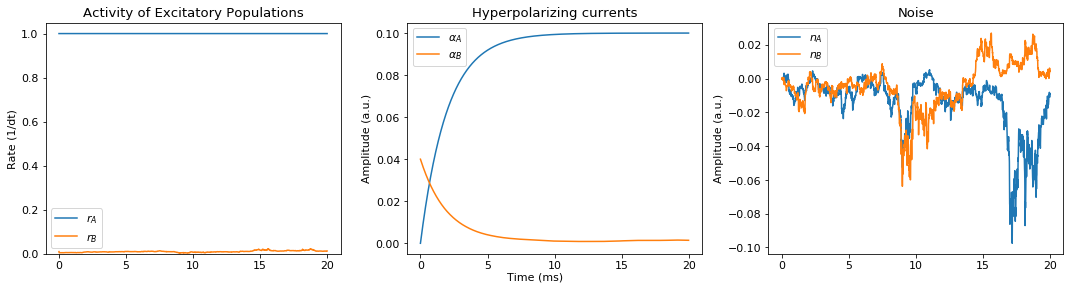

In [19]:
def ex25_plot(emmb):
  fig, axs = plt.subplots(1,3,figsize=(15, 4), facecolor='w', edgecolor='k',sharex=True)
  fig.subplots_adjust(hspace = .2, wspace=.1)
  axs = axs.ravel()

  # plt.rcParams.update({'font.size': 9})

  axs[0].plot(steps, emmb[:,0],label=r'$r_A$')
  axs[0].plot(steps, emmb[:,1],label=r'$r_B$')
  axs[0].set_title('Activity of Excitatory Populations')
  axs[0].set_ylim((0,1.05))
  axs[0].set_ylabel('Rate (1/dt)')
  axs[0].legend()


  axs[1].plot(steps, emmb[:,2],label=r'$\alpha_A$')
  axs[1].plot(steps, emmb[:,3],label=r'$\alpha_B$')
  axs[1].set_title('Hyperpolarizing currents')
  axs[1].set_ylabel('Amplitude (a.u.)')
  axs[1].legend()

  axs[2].plot(steps, emmb[:,4],label=r'$n_A$')
  axs[2].plot(steps, emmb[:,5],label=r'$n_B$')
  axs[2].set_title('Noise')
  axs[2].set_ylabel('Amplitude (a.u.)')
  axs[2].legend()

  fig.text(0.5, 0.01, 'Time (ms)', ha='center')
  fig.tight_layout()
  fig.show()

ex25_plot(emmb)

5. Now simulate for t up to 500 (again with ∆t = 0.01). Determine the dominance
durations (if you implemented it correctly, you can simply use function dominance durations from exercise 1). Plot a histogram of the dominance durations.
What is their mean?


The first few dominance durations for population 1 in a simulation over 500 time units are [2.423e+01 1.600e-01 3.000e-02 2.000e-02 4.000e-02 1.000e-02]
The mean dominance duration for population A is 0.8795620437956204


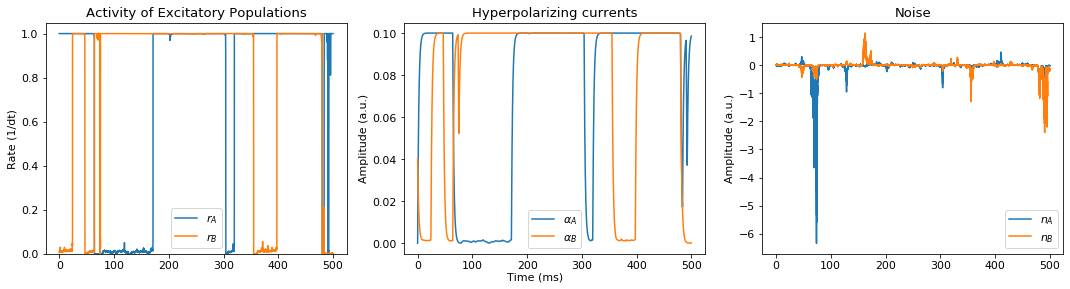

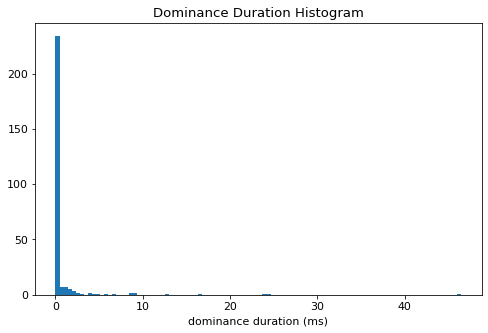

In [20]:
t = np.arange(500+1)
dt = .01

steps, emmb = euler_maruyama(f_moreno_bote, g_moreno_bote, x0, t,dt)
ex25_plot(emmb)

rA = emmb[:,0]
rB = emmb[:,1]
ddmb1 = dominance_durations(rA,rB,t,dt)

print(f'The mean dominance duration for population A is {ddmb1.mean()}')
plt.figure(figsize=(8,5))
plt.hist(ddmb1,bins=100)
plt.title('Dominance Duration Histogram')
plt.xlabel('dominance duration (ms)')
plt.show()

6. What is the influence of γ in the model? How and why does the histogram change
if you choose γ = 0? Repeat your simulation with γ = 0 and estimate the mean
dominance duration.

In [0]:
# redefining model, gamma = 0
def f_moreno_bote(x0,t):

  # parameter settings
  ga = gb = .05
  alpha = .75
  beta = .5
  gamma = 0
  phi = .5
  tau = .01
  tau_a = tau_b = 2
  eta = .5
  theta = .1
  k = .05

  # initial conditions
  rA, rB, alpha_A, alpha_B, n_A, n_B = x0
  # rA, alpha_A = x0[0:2]

  r_pool = relu(phi*(rA+rB)+ga+gb)
  rAinh = (r_pool - eta*rA)**2
  rBinh = (r_pool - eta*rB)**2

  drAdt = (-rA + iocurve(alpha*rA - beta*rAinh + ga 
                         - alpha_A + n_A, theta, k))/tau

  drBdt = (-rB + iocurve(alpha*rB - beta*rBinh + gb 
                         - alpha_B + n_B, theta, k))/tau

  daAdt = (-alpha_A + gamma*rA)/tau_a

  daBdt = (-alpha_B + gamma*rB)/tau_b

  return np.array([drAdt,drBdt,daAdt,daBdt,0,0])

The first few dominance durations for population 1 in a simulation over 500 time units are [4.31 0.01 0.01 0.79 0.24 0.02]
The mean dominance duration for population A is 0.44022388059701495


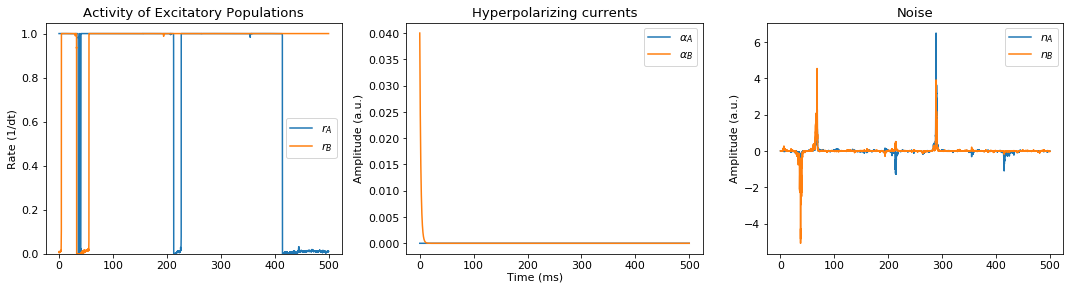

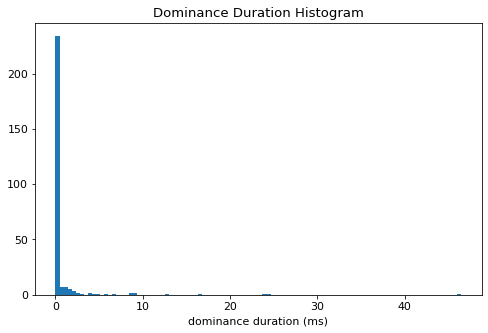

In [22]:
steps, emmb = euler_maruyama(f_moreno_bote, g_moreno_bote, x0, t,dt)
ex25_plot(emmb)

rA = emmb[:,0]
rB = emmb[:,1]
ddmb2 = dominance_durations(rA,rB,t,dt)

print(f'The mean dominance duration for population A is {ddmb2.mean()}')
plt.figure(figsize=(8,5))
plt.hist(ddmb1,bins=100)
plt.title('Dominance Duration Histogram')
plt.xlabel('dominance duration (ms)')
plt.show()

Decreasing gamma has the same effect of reducing lambda in the poisson pdf, it shift the dominance duration values lower. Decreasing gamma also changes the hyperpolarizing currents, which are driven to zero and remain there throughout the simulations. This means less variation in the activity of the two populations.

7. Try to find a setting of parameters with γ = 0 which has a mean dominance
duration close (within 0.2 time units) to the first simulation from exercise 2.5.
Show all three duration distributions in one histogram plot. How do they differ?

In [0]:
# re-redefining model, gamma = 0, but with non-gamma paramters changed so
# dominance duration mean is similar to that of gamma = .1

def f_moreno_bote(x0,t):

  # parameter settings
  ga = gb = .05
  alpha = .75
  beta = .5
  gamma = 0
  phi = .5
  tau = .01
  tau_a = tau_b = .05
  eta = .5
  theta = .1
  k = .05

  # initial conditions
  rA, rB, alpha_A, alpha_B, n_A, n_B = x0
  # rA, alpha_A = x0[0:2]

  r_pool = relu(phi*(rA+rB)+ga+gb)
  rAinh = (r_pool - eta*rA)**2
  rBinh = (r_pool - eta*rB)**2

  drAdt = (-rA + iocurve(alpha*rA - beta*rAinh + ga 
                         - alpha_A + n_A, theta, k))/tau

  drBdt = (-rB + iocurve(alpha*rB - beta*rBinh + gb 
                         - alpha_B + n_B, theta, k))/tau

  daAdt = (-alpha_A + gamma*rA)/tau_a

  daBdt = (-alpha_B + gamma*rB)/tau_b

  return np.array([drAdt,drBdt,daAdt,daBdt,0,0])

In [24]:
steps, emmb = euler_maruyama(f_moreno_bote, g_moreno_bote, x0, t,dt)

rA = emmb[:,0]
rB = emmb[:,1]
ddmb3 = dominance_durations(rA,rB,t,dt)

print (f'Mean dominance duration for gamma = .1 is {ddmb1.mean()} \n and for gamma = 0, tau_a = tau_b = .05 is {ddmb3.mean()}')

The first few dominance durations for population 1 in a simulation over 500 time units are [5.489e+01 2.500e-01 5.600e-01 6.800e-01 1.230e+00 1.000e-02]
Mean dominance duration for gamma = .1 is 0.8795620437956204 
 and for gamma = 0, tau_a = tau_b = .05 is 0.671318407960199


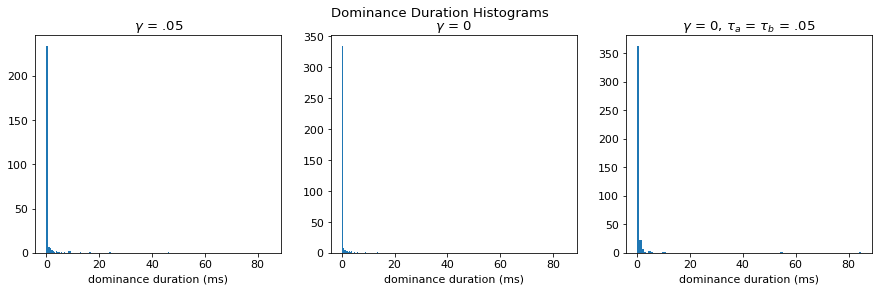

In [25]:
ddmbs = [ddmb1, ddmb2, ddmb3]
titles = [r'$\gamma$ = .05',r'$\gamma$ = 0',r'$\gamma$ = 0, $\tau_a$ = $\tau_b$ = .05']

fig, axs = plt.subplots(1,3,figsize=(15, 4), facecolor='w', edgecolor='k',sharex=True,sharey=False)
fig.subplots_adjust(wspace=.2)
axs = axs.ravel()

fig.suptitle('Dominance Duration Histograms')

for i,x in enumerate(ddmbs):
  axs[i].hist(x,bins=100)
  axs[i].set_xlabel('dominance duration (ms)')
  axs[i].set_title(f'{titles[i]}')

fig.show()

With gamma = 0, there is a larger spread of dominance durations. When other parameters are changed to keep the mean dominance durations similar to the model where gamma = .05, the spread reduces but the number of low durations of dominance (i.e. ~1ms) stays the same.